Q2 (50pts): For this question you will use the dataset titled “laptop-price – dataset.csv”.

Import the libraries mentioned above and import the dataset from your filesystem into the
code.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


laptop_price=pd.read_csv('laptop_price - dataset.csv')
laptop_price = laptop_price.drop_duplicates()
laptop_price.head(5)
#laptop_price.info()



,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60



• Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".
o For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.


Plot the price of all the laptops

In [3]:

#Plot the price of all the laptops
fig = px.scatter(laptop_price, x='Product', y='Price (Euro)', color='Company', 
                hover_name='Product',
                title='Laptop Prices ',
                width=1000,
                height=1000)

fig.show()


Which company has on average the most expensive laptop? What is the average
laptop price for each company?

ANS: From the graph under, the Company with the most expensive laptops is Razer with an average of 3,346.143 Euro. 

In [4]:

fig=px.histogram(laptop_price, x='Company',y='Price (Euro)',histfunc='avg',
                labels={'Score': 'Average Score', 'Category': 'Categories'},
                title='Average Scores by Company', color='Company',
                text_auto=True  )
fig.show()


Find the different types of Operating systems present in the data - under the column
name "OpSys".
 o Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

ANS: We can see after fixing the names of the operating systems we are left with 7 different types of operating systems:
-Mac OS X
-No OS
-Windows 10
-Linux
-Android
-Chrome OS
-Windows 7

In [3]:
print(laptop_price['OpSys'].unique()) #check all type of systems under OpSys
# macOS = Mac OS X ,  Windows 10= Windows 10 S 
#fixing the names:
laptop_price['OpSys'] = laptop_price['OpSys'].replace('Mac OS X','macOS' )
laptop_price['OpSys'] = laptop_price['OpSys'].replace('Windows 10 S', 'Windows 10')
print(laptop_price['OpSys'].unique()) # check the changes

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

In [4]:

fig = px.box(laptop_price, 
        x='OpSys', 
        y='Price (Euro)', 
        points='all')
fig.update_layout(
        title="Distributionof of the prices for each OS",
        xaxis_title="Operating System",
        yaxis_title="Price (Euro)")


fig.show()

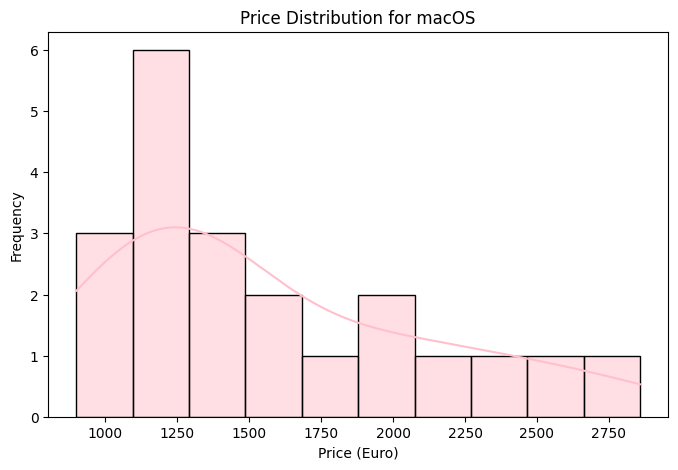

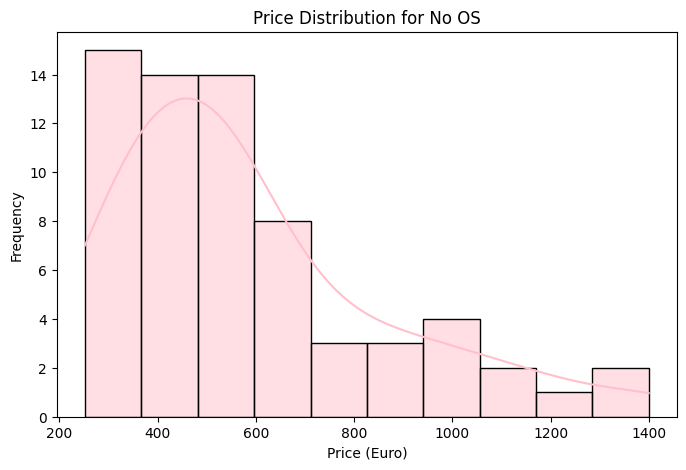

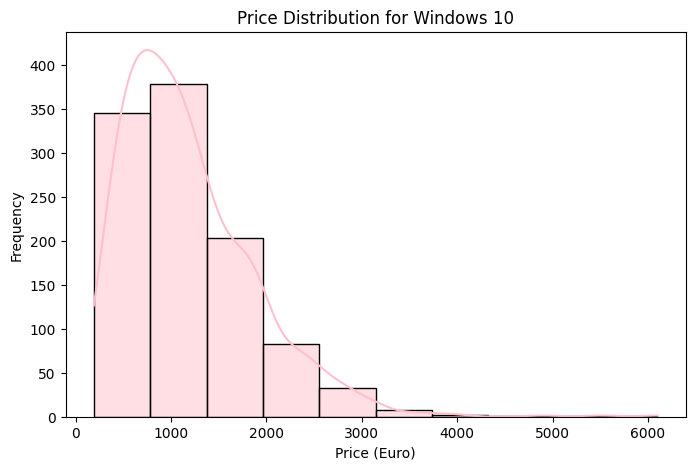

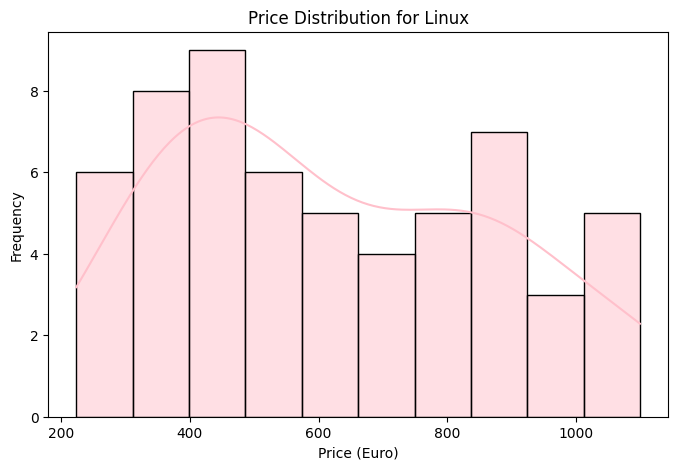

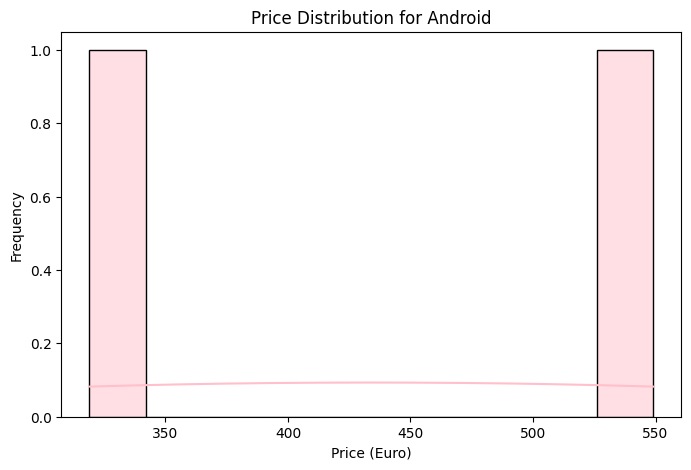

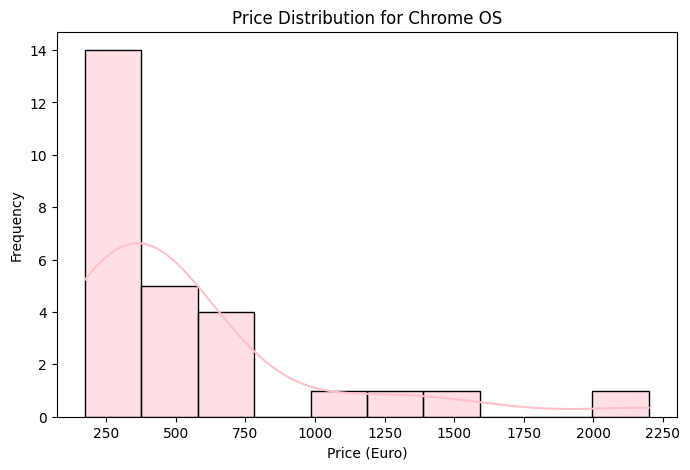

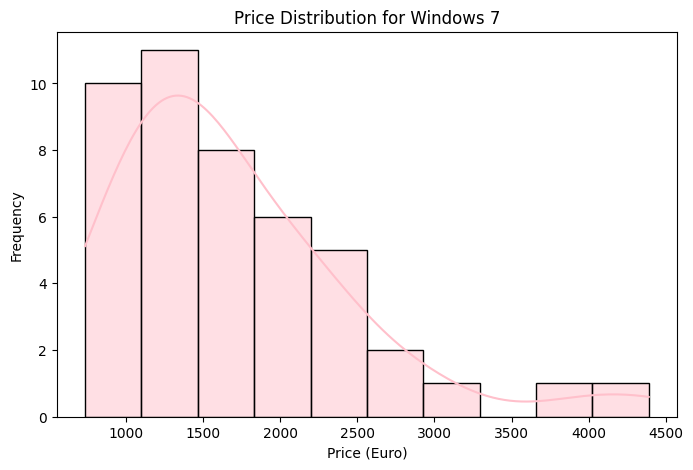

In [5]:
unique_opsys = laptop_price['OpSys'].unique()
for op_sys in unique_opsys:
    plt.figure(figsize=(8, 5))  # Create a new figure
    subset = laptop_price[laptop_price['OpSys'] == op_sys]  # Filter rows for the current OS
    sns.histplot(subset['Price (Euro)'], kde=True, bins=10, color="pink")
    plt.title(f"Price Distribution for {op_sys}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Frequency")
    plt.show()

What is the relationship between RAM and computer price? add an adequate plot to
support your findings.

used this site: https://www.geeksforgeeks.org/how-to-draw-a-line-inside-a-scatter-plot/
ANS:The graph shows a positive correlation between RAM and laptop price, indicating that as the amount of RAM increases, the price of laptops tends to rise. However, the data for laptops with higher RAM is limited, as shown by the widening confidence interval, making it harder to draw definitive conclusions in this range. 

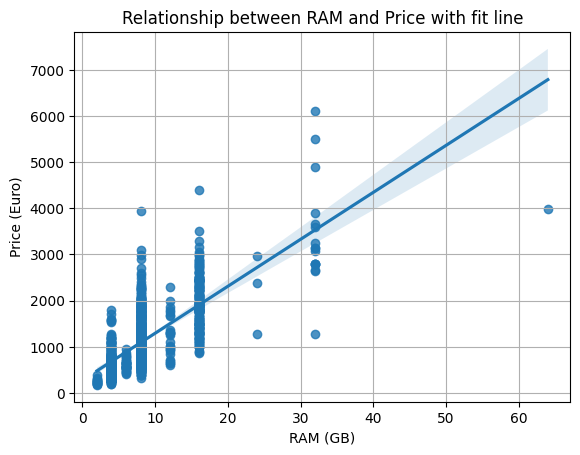

In [6]:
sns.regplot(data=laptop_price, x='RAM (GB)', y='Price (Euro)')
plt.title('Relationship between RAM and Price with fit line')
plt.grid(True)
plt.show()

Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".
For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

In [7]:
print(laptop_price['Memory'].unique()) #checking all kinds of Systems by the Memory
laptop_price['Storage type'] = laptop_price['Memory'].str.extract('(SSD|HDD|Flash Storage|Hybrid)') # extracting the Storage type from Memory
print(laptop_price['Storage type'].unique()) 



['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
['SSD' 'Flash Storage' 'HDD' 'Hybrid']


Q3 : Think of additional questions related to this data. What types of analyses and visualizations would you use to address them? Select two questions from your list and implement. Submit your list of questions, suggested analyses and visualizations and the implementation.

ANS: 
List of Questions:
1. what is the relationship between CPU frequency and price?
2.What is the average price for laptops with different storage types 
3.what is the laptop with  high performance (CPU, RAM) but with low price?
4. what is the difference between mean wight for each type(ultrabook/ notebook)?


with the threshold parameters : 
 Ram(GB)=8.067961165048544
 CPU frequency:2.2656634304207115
 Price(Euro):1028.910922330097 

Laptops with high performance but low prices:
285          SP315-51 (i7-7500U/12GB/1TB/FHD/W10)
775     Q524UQ-BHI7T15 (i7-7500U/12GB/2TB/GeForce
611                                 Inspiron 7559
69      FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce
1061                            Rog G752VL-GC088D
962                           Aspire F5-573G-510L
Name: Product, dtype: object


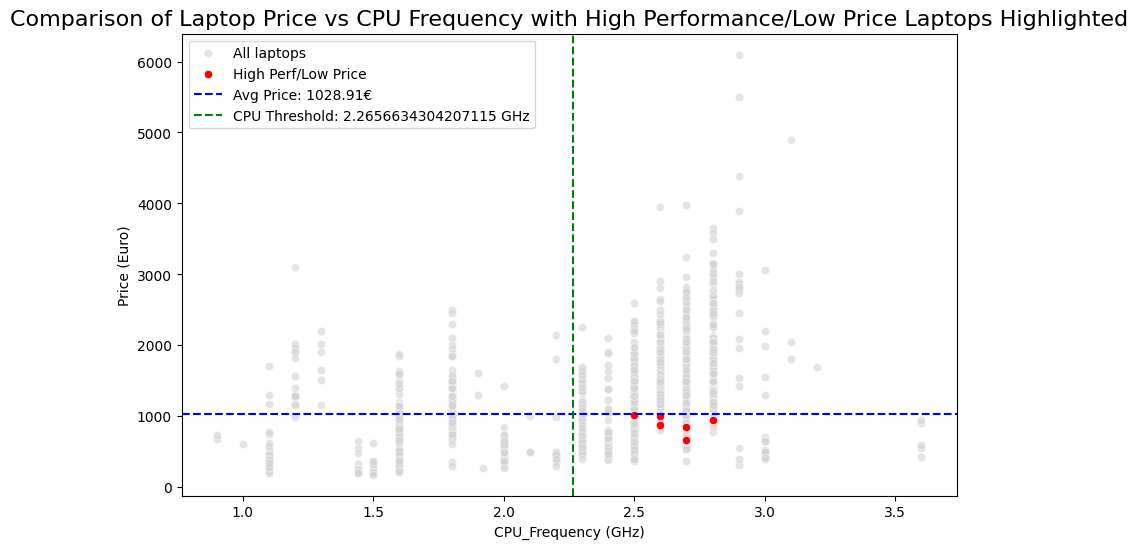

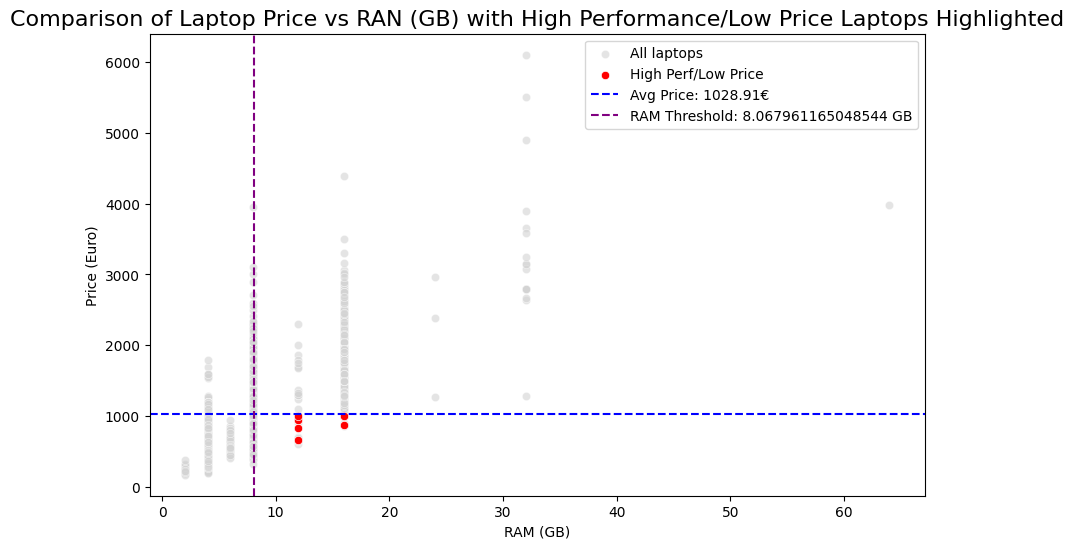

In [71]:
# 3.what is the laptop with  high performance (CPU, RAM) but with low price?
#make sure i dont have repeating products :
laptop_price_unique = laptop_price.sort_values(by='Price (Euro)').drop_duplicates(subset='Product', keep='first')
#first i will set a threshold for each parameter by the mean
cpu_threshold = laptop_price_unique['CPU_Frequency (GHz)'].mean()  
ram_threshold = laptop_price_unique['RAM (GB)'].mean()
#find the mean price so i can look for the cheapest laptops
average_price = laptop_price_unique['Price (Euro)'].mean()


#filter the data with the threholds
high_perf_low_price = laptop_price_unique[ (laptop_price_unique['CPU_Frequency (GHz)'] > cpu_threshold) &
                                (laptop_price_unique['RAM (GB)'] >= ram_threshold) &
                                (laptop_price_unique['Price (Euro)'] < average_price)]
print(f"with the threshold parameters : \n Ram(GB)={ram_threshold}\n CPU frequency:{cpu_threshold}\n Price(Euro):{average_price} ")
print(f"\nLaptops with high performance but low prices:\n{high_perf_low_price['Product']}")

#plot my reasults
# price compered with CPU
plt.figure(figsize=(10, 6))
sns.scatterplot(data=laptop_price, x='CPU_Frequency (GHz)', y='Price (Euro)',
                color='lightgray', label='All laptops', alpha=0.6)
sns.scatterplot(data=high_perf_low_price, x='CPU_Frequency (GHz)', y='Price (Euro)',
                color='red', label='High Perf/Low Price')
plt.axhline(average_price, color='blue', linestyle='--', label=f'Avg Price: {average_price:.2f}€')
plt.axvline(cpu_threshold, color='green', linestyle='--', label=f'CPU Threshold: {cpu_threshold} GHz')
plt.title('Comparison of Laptop Price vs CPU Frequency with High Performance/Low Price Laptops Highlighted', fontsize=16)
plt.legend()
plt.show()


#price compered with Ram
plt.figure(figsize=(10, 6))
sns.scatterplot(data=laptop_price, x='RAM (GB)', y='Price (Euro)',
                color='lightgray', label='All laptops', alpha=0.6)
sns.scatterplot(data=high_perf_low_price, x='RAM (GB)', y='Price (Euro)',
                color='red', label='High Perf/Low Price')
plt.axhline(average_price, color='blue', linestyle='--', label=f'Avg Price: {average_price:.2f}€')
plt.axvline(ram_threshold, color='purple', linestyle='--', label=f'RAM Threshold: {ram_threshold} GB')
plt.title('Comparison of Laptop Price vs RAN (GB) with High Performance/Low Price Laptops Highlighted', fontsize=16)
plt.legend()
plt.show()


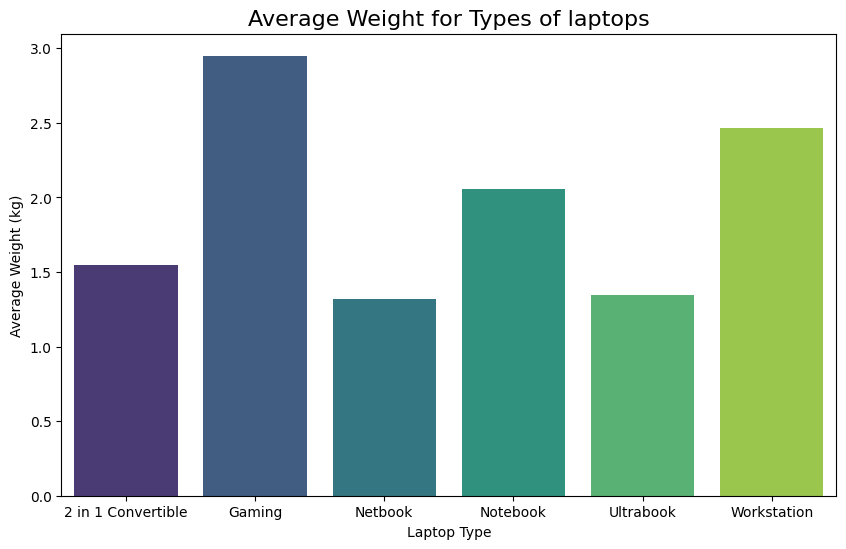

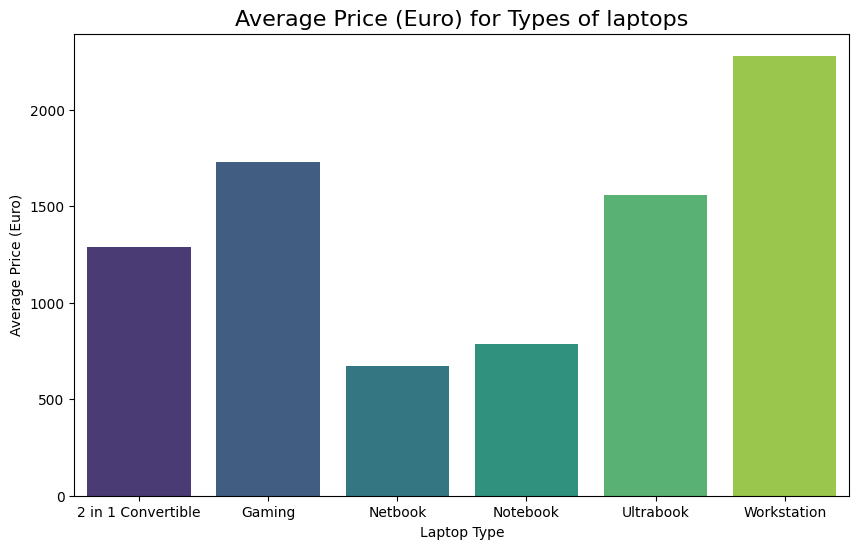

In [66]:
#4. what is the difference between mean weight and price for each type(ultrabook/ notebook)?

# Group by 'TypeName' and calculate the average weight
avg_weight_by_type = laptop_price.groupby('TypeName')['Weight (kg)'].mean().reset_index()
# Plot the average weight by TypeName
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_weight_by_type, x='TypeName', y='Weight (kg)', hue='TypeName', palette='viridis')

# Add labels and title
plt.title('Average Weight for Types of laptops', fontsize=16)
plt.xlabel('Laptop Type')
plt.ylabel('Average Weight (kg)')
plt.show()

#The same for Price:
avg_Price_by_type = laptop_price.groupby('TypeName')['Price (Euro)'].mean().reset_index()
# Plot the average weight by TypeName
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_Price_by_type, x='TypeName', y='Price (Euro)', hue='TypeName', palette='viridis')

# Add labels and title
plt.title('Average Price (Euro) for Types of laptops', fontsize=16)
plt.xlabel('Laptop Type')
plt.ylabel('Average Price (Euro)')
plt.show()


